# Data Visualization Project (Loan Data from Prosper)
## by Taima Alosaimi

## Introduction
> Loan Data from Prosper dataset: This dataset is financial dataset and this is related to the loan, borrowers, lenders, interest rates and stuffs like that. Prosper or Prosper Marketplace Inc. is a San Francisco, California based company specializing in loans at low interest rates to the borrowers.

there are (113,937) loans with (81) associated variables (characteristics), some of the variables are:

- Term: The length of the loan expressed in months.
- LoanStatus : Current status of the loan: Cancelled, Chargedoff, Completed, Defaulted, FinalPaymentInProgress, PastDue, etc..
- ProsperScore : Risk Factor score from 1 to 10. 10 being least risky
- BorrowerAPR : The Borrower’s Annual Percentage Rate (APR) for the loan.
- BorrowerRate : The Borrower’s interest rate for this loan.
- EmploymentStatus : Current type of employment
- Occupation : Occupation of borrower at the time of listing
- ProsperRating..Alpha. : Prosper rating for borrowers in alphabets
- StatedMonthlyIncome : Monthly income of the borrower
- MonthlyLoanPayment : Monthly loan payment amount
- LoanOriginalAmount : Original amount of the loan

Data dictionary to understand all variables more in this link: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe, print statistics
df_loans = pd.read_csv('prosperLoanData.csv')
df_loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df_loans.shape

(113937, 81)

In [4]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
#Adjust Datetime columns
df_loans['ListingCreationDate'] = pd.to_datetime(df_loans['ListingCreationDate']) 
df_loans['ClosedDate'] = pd.to_datetime(df_loans['ClosedDate'])
df_loans['LoanOriginationDate'] = pd.to_datetime(df_loans['LoanOriginationDate'])

In [6]:
#Adjust datatype for all other categorical columns
df_loans['Occupation'] = df_loans['Occupation'].astype('category')
df_loans['ProsperScore'] = df_loans['ProsperScore'].astype('category')
df_loans['BorrowerState'] = df_loans['BorrowerState'].astype('category')
df_loans['LoanStatus'] = df_loans['LoanStatus'].astype('category')
df_loans['EmploymentStatus'] = df_loans['EmploymentStatus'].astype('category')

In [7]:
# mapping the list dictionary of ListingCategory
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df_loans['ListingCategory'] = df_loans['ListingCategory (numeric)'].map(list_dict)

In [8]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  category      
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

### What is the structure of your dataset?

> There are 113,937 loans in the dataset with 81 features, some of the variables are numeric, and some of the variables are categorical (both ordinal and nominal). also, there are some datetime variables.


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out What factors affect a BorrowerRate (The Borrower's interest rate for this loan) in the dataset.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that "EmploymentStatus, term, ProsperScore and LoanOriginalAmount" have the strongest effect on the interest rate.

## Univariate Exploration

I'll start by looking at the distribution of the main variables of interest: 

#### 1- BorrowerRate

In [9]:
df_loans.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

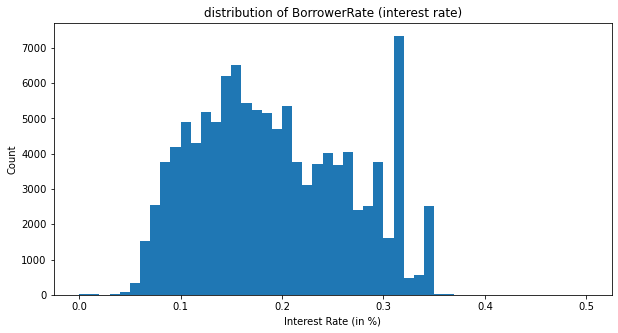

In [10]:
# Histogram to see distribution of BorrowerRate (interest rate)

binsize = 0.01
bins = np.arange(0, df_loans.BorrowerRate.max()+binsize, binsize)

plt.figure(figsize = (10, 5))
plt.hist(data = df_loans, x = 'BorrowerRate', bins = bins)
plt.xlabel('Interest Rate (in %)')
plt.ylabel('Count')
plt.title("distribution of BorrowerRate (interest rate)")
plt.show();

> Most of the borrowers have an interest rate between of 0.1 and 0.25, but with a peak at around 0.33.

#### 2- EmploymentStatus

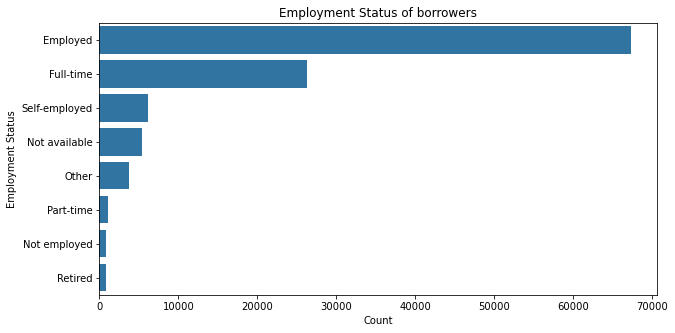

In [11]:
# Bar Chart to see Employment Status of borrowers

plt.figure(figsize = (10, 5))
default_color = sb.color_palette()[0]

type_order = df_loans['EmploymentStatus'].value_counts().index
sb.countplot(data= df_loans, y= 'EmploymentStatus', color= default_color, order = type_order)
plt.xlabel('Count')
plt.ylabel('Employment Status')
plt.title("Employment Status of borrowers");

> Most of the borrowers are employed of different kind of employment (full-time, part-time, self-emplpoyed), but some of the borrowers are unemployed or retired and they get a loan.

#### 3- Term

In [12]:
df_loans.groupby(['Term']).count()['BorrowerRate']

Term
12     1614
36    87778
60    24545
Name: BorrowerRate, dtype: int64

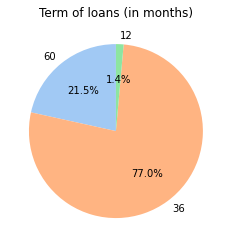

In [13]:
#pie chart to see term of loans

labels= ['60', '36', '12']

colors = sb.color_palette('pastel')[0:3]

sizes= [df_loans['Term'][df_loans['Term']== 60].count(), df_loans['Term'][df_loans['Term']== 36].count(), df_loans['Term'][df_loans['Term']== 12].count()]

plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

plt.title("Term of loans (in months)")

plt.show();

> as we can see from the graphs above, most of loans are with a term of 3 years (36 months)

#### 4- ProsperScore

A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.

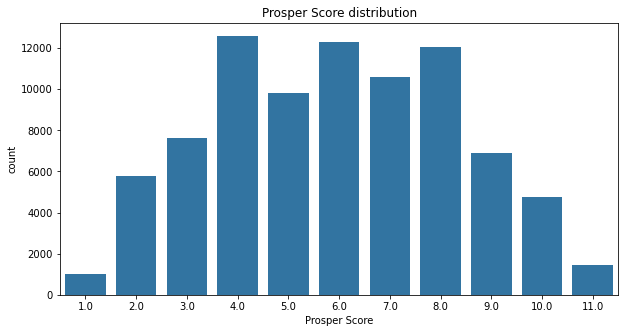

In [14]:
# Bar Chart to see ProsperScore

plt.figure(figsize = (10, 5))

sb.countplot(data = df_loans, x = 'ProsperScore', color = default_color)
plt.xlabel('Prosper Score')
plt.title("Prosper Score distribution");

In [15]:
#The bar chart shows that there are some borrowers with a score of 11 which should not be possible 
#since the score ranges from 1-10, so I will exclude all records with a Prosper Score of 11

df_loans = df_loans[df_loans['ProsperScore'] != 11]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


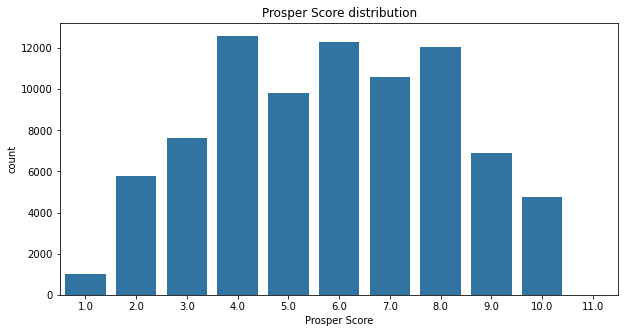

In [16]:
# plotting the bar chart of ProsperScore again

plt.figure(figsize = (10, 5))

sb.countplot(data = df_loans, x = 'ProsperScore', color = default_color)
plt.xlabel('Prosper Score')
plt.title("Prosper Score distribution");

> Prosper Score distribution almost normally distributed, Most of the borrowers have a low Prosper Score of 4. while the majority of the borrowers have a score between 5-8. Furthermore, not many borrowers received the highest score of 10.

#### 5- LoanOriginalAmount 

In [17]:
df_loans.LoanOriginalAmount.describe()

count    112481.000000
mean       8252.601133
std        6172.040285
min        1000.000000
25%        4000.000000
50%        6001.000000
75%       11500.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

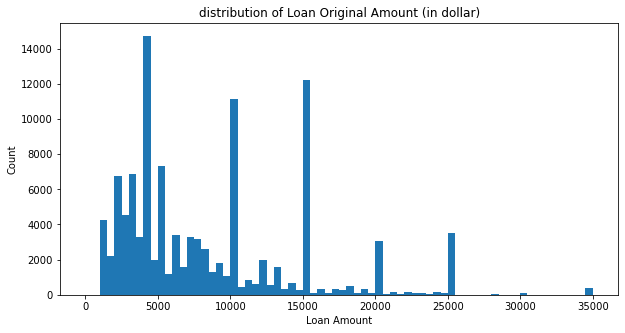

In [18]:
# Histogram to see distribution of LoanOriginalAmount (The origination amount of the loan)

binsize = 500
bins = np.arange(0, df_loans['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize = (10, 5))
plt.hist(data = df_loans, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title("distribution of Loan Original Amount (in dollar)")
plt.show();

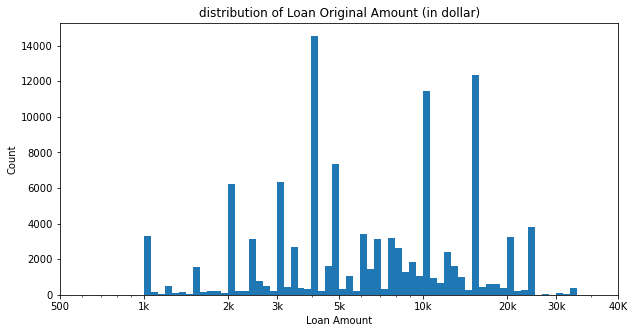

In [19]:
# there's a long tail in the distribution, so let's put it on a log scale instead

log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(df_loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize = (10, 5))
plt.hist(data = df_loans, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '40K'])
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title("distribution of Loan Original Amount (in dollar)")
plt.show();

> as we can see from the above graph most of the values are between 2K and 10K. The distribution has serval peaks at 4K, 10K and 15K, where the most loaned amounts are 4,000 and 15,000.

#### 6- LoanStatus

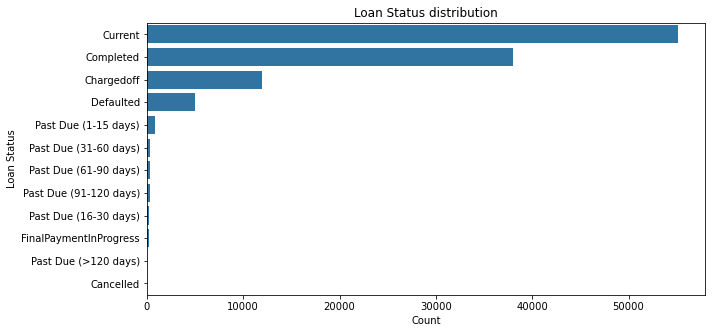

In [20]:
#bar chart to see LoanStatus

plt.figure(figsize = (10, 5))

type_order = df_loans['LoanStatus'].value_counts().index
sb.countplot(data = df_loans, y = 'LoanStatus', color = default_color, order = type_order)
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.title("Loan Status distribution");

In [21]:
# replacing Past Due (1-15 days), Past Due (31-60 days), etc... with just Past Due

df_loans['LoanStatus'] = df_loans['LoanStatus'].replace(['Past Due (1-15 days)', 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','Past Due (>120 days)'],'Past Due')

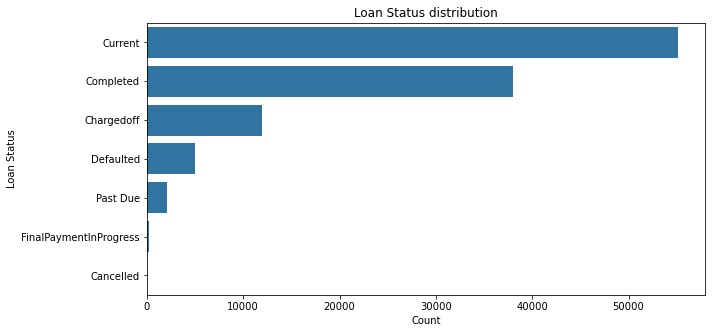

In [22]:
# plotting the bar chart of LoanStatus again

plt.figure(figsize = (10, 5))

type_order = df_loans['LoanStatus'].value_counts().index
sb.countplot(data = df_loans, y = 'LoanStatus', color = default_color, order = type_order)
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.title("Loan Status distribution");

> Most of the loans status are current and the second completed.

#### 7- MonthlyLoanPayment

In [23]:
df_loans.MonthlyLoanPayment.describe()

count    112481.000000
mean        270.513906
std         191.234362
min           0.000000
25%         130.760000
50%         215.990000
75%         369.040000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

In [24]:
df_loans.groupby(['MonthlyLoanPayment']).count()['BorrowerRate']

MonthlyLoanPayment
0.00       935
0.15         1
0.16         1
0.23         1
0.24         1
          ... 
2153.38      1
2163.63      1
2179.22      1
2218.53      1
2251.51      1
Name: BorrowerRate, Length: 23397, dtype: int64

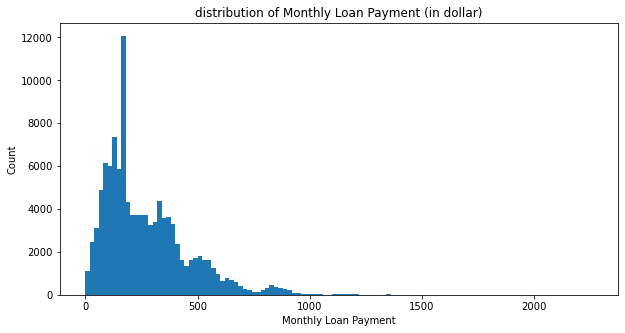

In [25]:
# Histogram to see distribution of MonthlyLoanPayment (The scheduled monthly loan payment)

binsize = 20
bins = np.arange(0, df_loans['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize = (10, 5))
plt.hist(data = df_loans, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Count')
plt.title("distribution of Monthly Loan Payment (in dollar)")
plt.show();

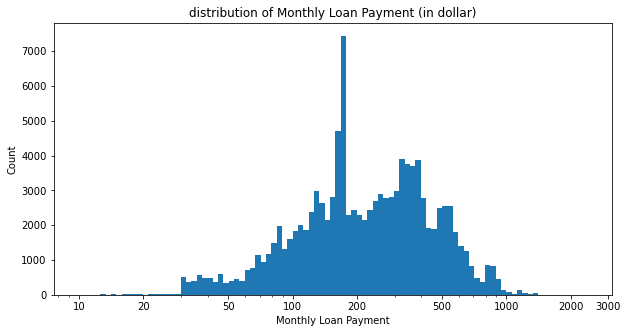

In [26]:
# there's a long tail in the distribution, so let's put it on a log scale instead

log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(df_loans['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize = (10, 5))
plt.hist(data = df_loans, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3, 3e3], ['10', '20','50', '100', '200', '500', '1000', '2000', '3000'])
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Count')
plt.title("distribution of Monthly Loan Payment (in dollar)")
plt.show();

> The distribution is normally distributed with a lot of montly payments between 70 and 400, and with a peak at around 170.

#### 8- ListingCreationDate

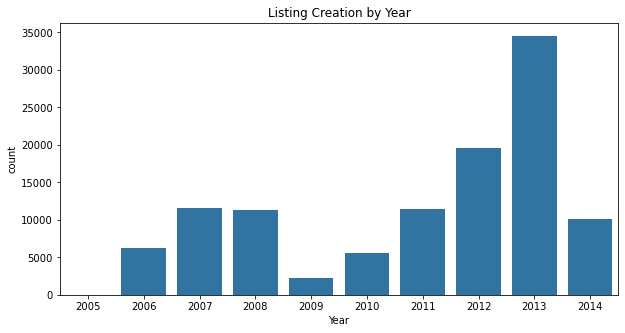

In [27]:
# Bar Chart to see ListingCreationDate of loans

plt.figure(figsize = (10, 5))

sb.countplot(data=df_loans, x=df_loans['ListingCreationDate'].dt.year, color=default_color)
plt.xlabel('Year')
plt.title('Listing Creation by Year');

> We can see that there is a drop in 2009 in loans, but it started to increase gradually and reached it's peak at 2013

#### 9- ListingCategory

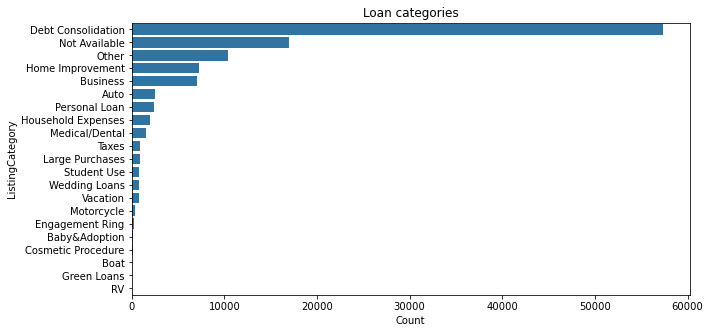

In [28]:
# Bar Chart to see ListingCategory (The category of the listing that the borrower selected when posting their listing)

plt.figure(figsize = (10, 5))
type_order = df_loans['ListingCategory'].value_counts().index

sb.countplot(data = df_loans, y = 'ListingCategory', color = default_color, order = type_order)
plt.xlabel('Count')
plt.ylabel('ListingCategory')
plt.title("Loan categories");

> The most common category is Debt consolidation with a large difference between it and the other categories

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - The distribution of the BorrowerRate shows that most of the borrowers have an interest rate between of 0.1 and 0.25, but with a peak at around 0.33.
> - The distribution of the EmploymentStatus shows that most of the borrowers are employed of different kind of employment (full-time, part-time, self-emplpoyed), but some of the borrowers are unemployed or retired and they get a loan.
> - The distribution of the lenght of the loan (Term) shows that most of loans are with a term of 3 years (36 months) followed by 60 months and finally a small amounts of loans have the minium lenght of 12 months.
> - Prosper Score distribution almost normally distributed, Most of the borrowers have a low Prosper Score of 4. while the majority of the borrowers have a score between 5-8. Furthermore, not many borrowers received the highest score of 10.
> - The distribution of the LoanOriginalAmount shows that most of the values are between 2K and 10K. The distribution has serval peaks at 4K, 10K and 15K, where the most loaned amounts are 4,000 and 15,000.
> - The distribution of the LoanStatus shows that most of the loans status are current and the second completed.
> - MonthlyLoanPayment distribution is normally distributed with a lot of montly payments between 70 and 400, and with a peak at around 170.
> - The distribution of the ListingCreationDate shows that there is a drop in 2009 in loans, but it started to increase gradually and reached it's peak at 2013
> - The distribution of the ListingCategory The most common category is Debt consolidation with a large difference between it and the other categories


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> **Some Unusual distributions:**
> - most of the borrowers are employed of different kind of employment (full-time, part-time, self-emplpoyed) but some of the borrowers are unemployed or retired  and they could get a loan.
> - There are around 935 loans with a monthly payment of 0 which does not make sense but maybe they related to some special agreements (for example: the customer does not need to pay back the loan for the first 6 months).

> **some operations on the data (tidy, adjust, change the form of the data):**
> - first I select only the columns that are related to our exploration of the loan. So I chose about 23 Out of 81 columns to investigate
> - I adjusted the datetime columns ('ListingCreationDate', 'ClosedDate', 'LoanOriginationDate')
> - I adjusted datatype for the categorical columns ('Occupation', 'ProsperScore', 'BorrowerState', 'LoanStatus', 'EmploymentStatus')
> - then mapping the list dictionary of ListingCategory
> - after that replacing the (Past Due (1-15 days), Past Due (31-60 days), etc...) with just (Past Due) in the bar chart of LoanStatus
> - The bar chart of the ProsperScore shows that there are some borrowers with a score of 11 which should not be possible since the score ranges from 1-10, so I cleaned (exclude all records with a Prosper Score of 11)


## Bivariate Exploration

> In this section, I will investigate the relationships between pairs of variables in the dataset. As I mentoined before, I am interested in the relationship between some variables with the Borrower Rate (interest rate).

#### 1- EmploymentStatus

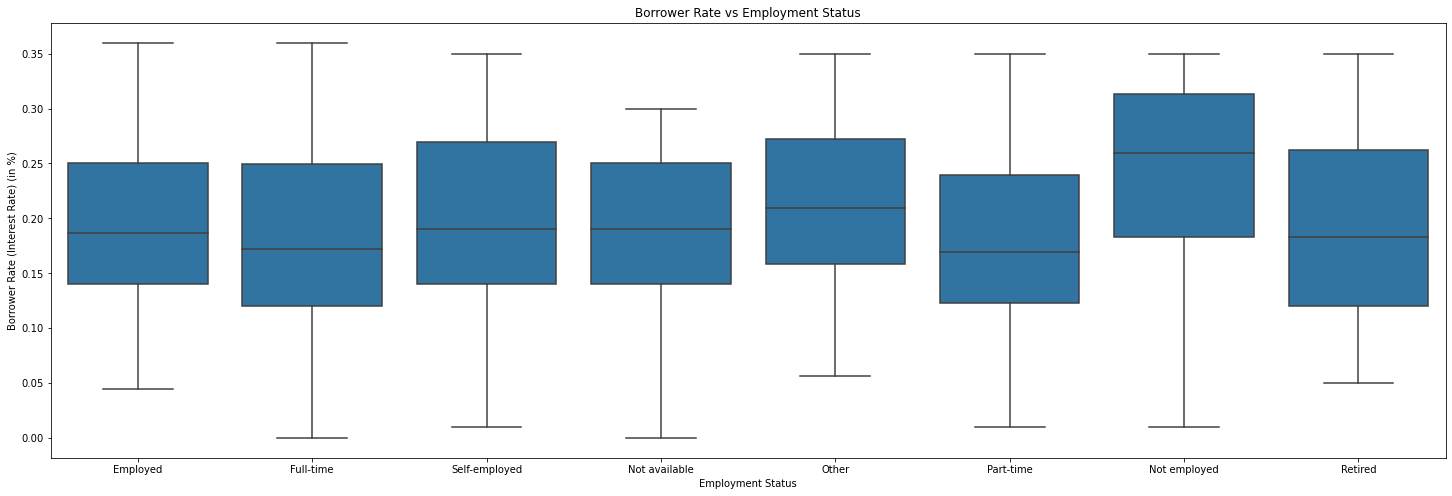

In [30]:
#plot EmploymentStatus against BorrowerRate using boxplot

plt.figure(figsize = (25, 8))
type_order = df_loans['EmploymentStatus'].value_counts().index

sb.boxplot(data = df_loans, x = 'EmploymentStatus', y = 'BorrowerRate', color = default_color, order = type_order)
plt.xlabel('Employment Status')
plt.ylabel('Borrower Rate (Interest Rate) (in %)')
plt.title("Borrower Rate vs Employment Status");

> the graph above shows that there are some negative relationship between employment status and interest rate. where not employed Borrowers have in average higher interest rate than the Borrowers who have jobs.

#### 2- Term

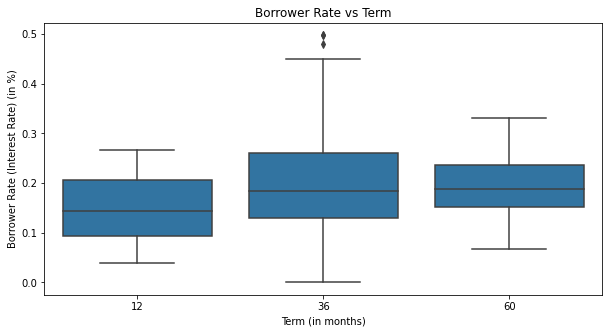

In [31]:
#plot Term against BorrowerRate using boxplot

plt.figure(figsize = (10, 5))

sb.boxplot(data = df_loans, x = 'Term', y = 'BorrowerRate', color = default_color)
plt.xlabel('Term (in months)')
plt.ylabel('Borrower Rate (Interest Rate) (in %)')
plt.title("Borrower Rate vs Term");

> as we see there is a positive relationship between term and interest rate, where 36 and 60 have in average higher interest rate than 12. so, We can conclude that the higher the length of loan term the higher the interest rate.

#### 3- ProsperScore

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


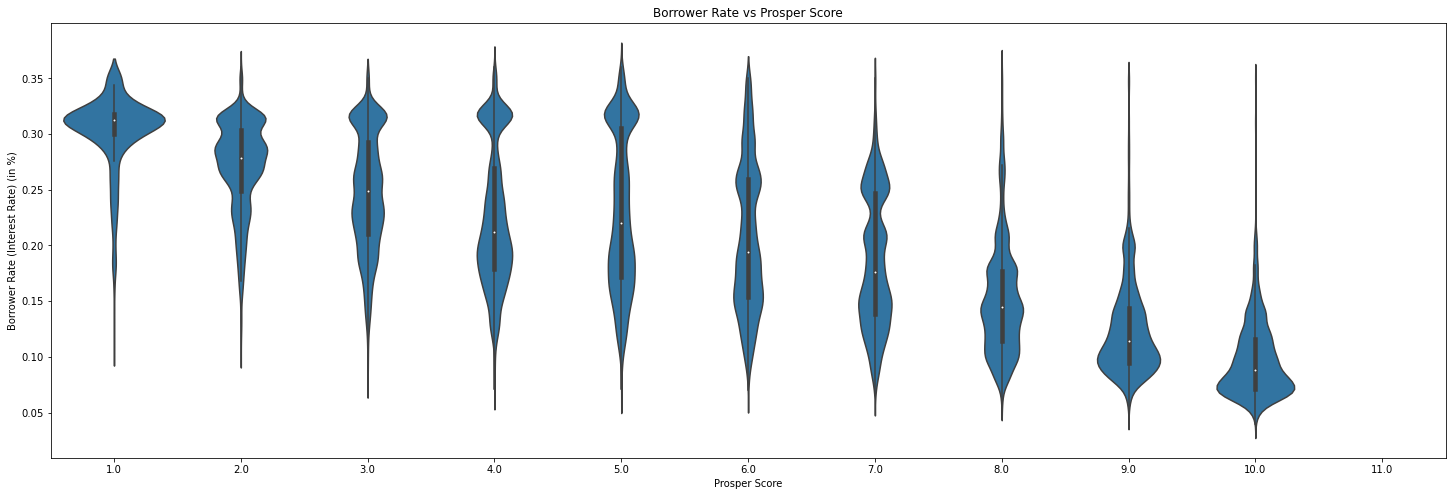

In [32]:
#plot ProsperScore against BorrowerRate using violinplot

plt.figure(figsize = (25, 8))

sb.violinplot(data = df_loans, x = 'ProsperScore', y = 'BorrowerRate', color = default_color)
plt.xlabel('Prosper Score')
plt.ylabel('Borrower Rate (Interest Rate) (in %)')
plt.title("Borrower Rate vs Prosper Score");

> from the graph above we can see a clear and strong relationship between Prosper Score and interest rate. so, We can conclude that the higher the score the lower the interest rate.

#### 4- LoanOriginalAmount

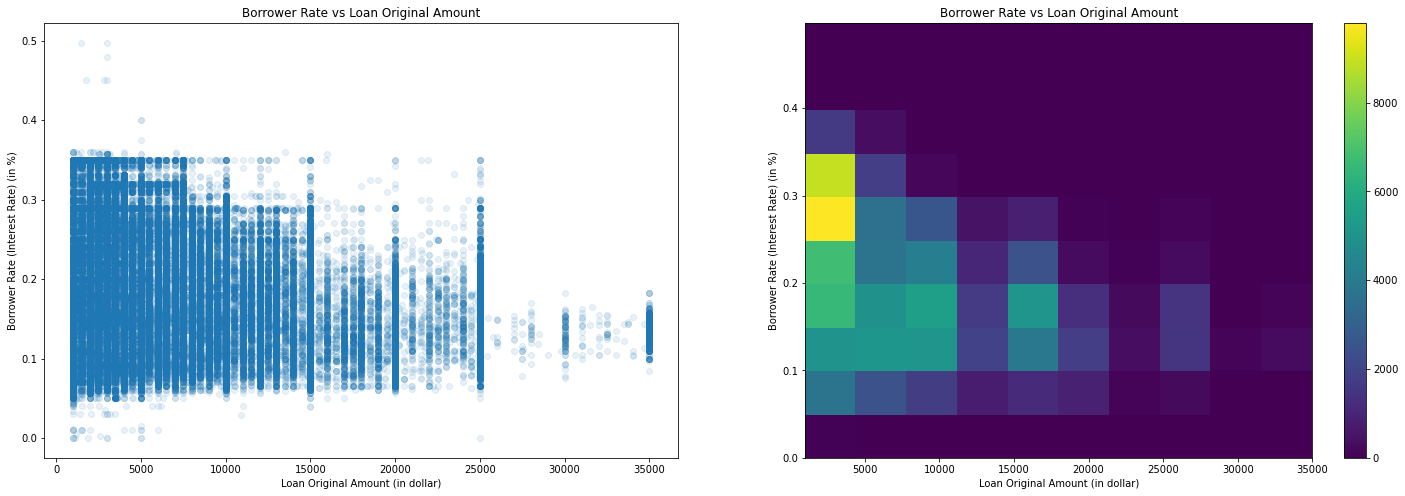

In [33]:
#plot LoanOriginalAmount against BorrowerRate using scatterplot and heatmap

plt.figure(figsize = (25, 8))

plt.subplot(1, 2, 1)
sb.regplot(data = df_loans, x = 'LoanOriginalAmount', y = 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Loan Original Amount (in dollar)')
plt.ylabel('Borrower Rate (Interest Rate) (in %)')
plt.title("Borrower Rate vs Loan Original Amount");

plt.subplot(1, 2, 2)
plt.hist2d(data = df_loans, x = 'LoanOriginalAmount', y = 'BorrowerRate')
plt.colorbar()
plt.xlabel('Loan Original Amount (in dollar)')
plt.ylabel('Borrower Rate (Interest Rate) (in %)')
plt.title("Borrower Rate vs Loan Original Amount");

> We can see from the graph above that there is a negative relationship between loan original amount and interest rate, means large loan amount have less interest rate than low loan amount.

#### 5- ListingCategory

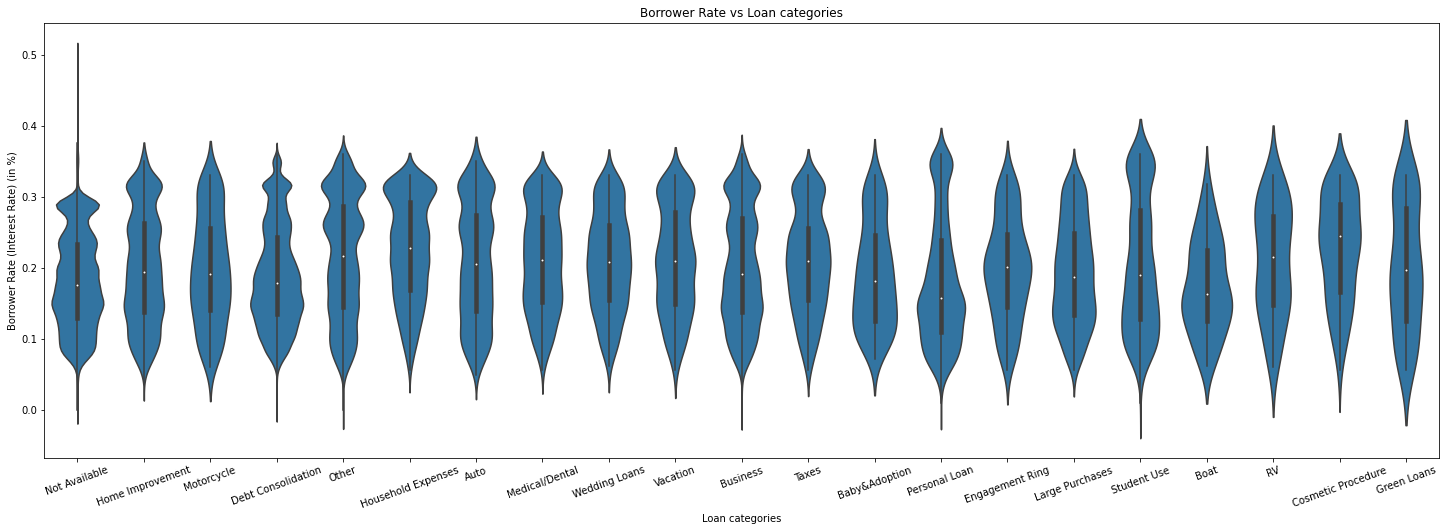

In [34]:
#plot ListingCategory against BorrowerRate using violinplot

plt.figure(figsize = (25, 8))

sb.violinplot(data = df_loans, x = 'ListingCategory', y = 'BorrowerRate', color = default_color)
plt.xlabel('Loan categories')
plt.ylabel('Borrower Rate (Interest Rate) (in %)')
plt.title("Borrower Rate vs Loan categories")
plt.xticks(rotation = 20);

> We can see that Cosmetic Procedure loans have highest interest rates while personal loans have lowest interest rate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - EmploymentStatus: the graph above shows that there are some negative relationship between employment status and interest rate. where not employed Borrowers have in average higher interest rate than the Borrowers who have jobs.
> - Term: as we see there is a positive relationship between term and interest rate, where 36 and 60 have in average higher interest rate than 12. so, We can conclude that the higher the length of loan term the higher the interest rate.
> - ProsperScore: from the graph above we can see a clear and strong relationship between Prosper Score and interest rate. so, We can conclude that the higher the score the lower the interest rate.
> - LoanOriginalAmount: We can see from the graph above that there is a negative relationship between loan original amount and interest rate, means large loan amount have less interest rate than low loan amount.
> - ListingCategory: We can see that Cosmetic Procedure loans have highest interest rates while personal loans have lowest interest rate.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 'ListingCategory' was not one of interesting features at the beginning of the investigation, but the plots shows that some categories have high interest rate and some have low interest rate.

## Multivariate Exploration

> In this section, I would like to more investigate the relationship between the BorrowerRate (interest rate) with the features that seem to have the strongest impact on interest rate which are (Term, ProsperScore)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


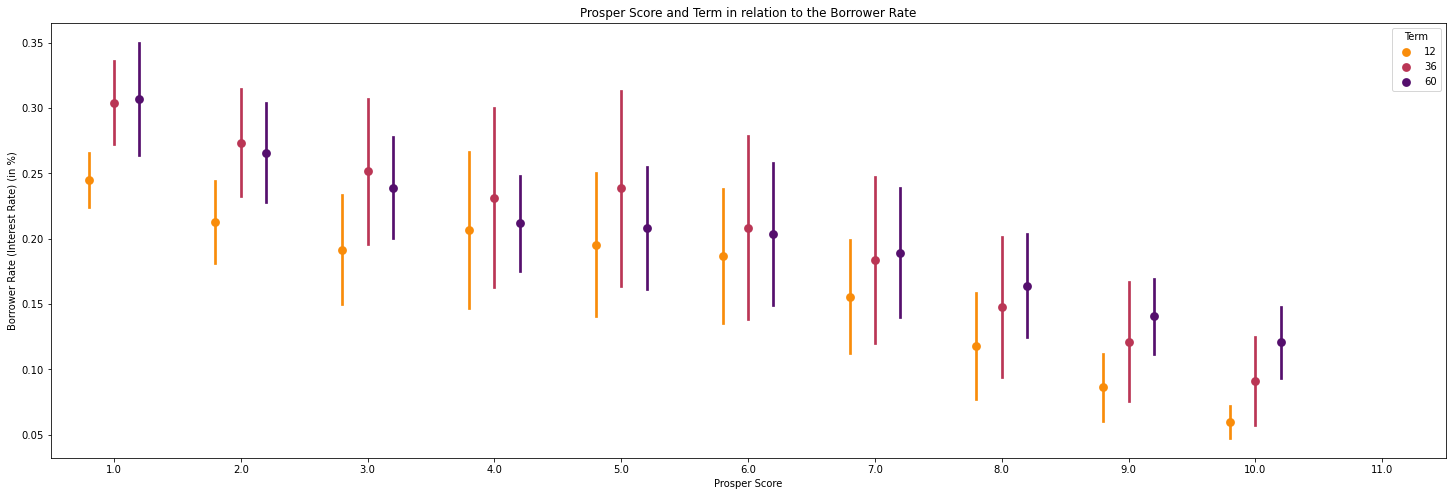

In [35]:
#plot Prosper Score and Term in relation to the Borrower Rate using pointplot 

plt.figure(figsize = (25, 8))

ax = sb.pointplot(data = df_loans, x = 'ProsperScore', y = 'BorrowerRate', hue = 'Term',
           palette = 'inferno_r', linestyles = '',dodge = 0.4, ci='sd')

plt.xlabel('Prosper Score')
plt.ylabel('Borrower Rate (Interest Rate) (in %)')
plt.title("Prosper Score and Term in relation to the Borrower Rate");

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We note that the loans of 5 year (60 months) are generally have higher rate than the other loan regardless of the prosper Score (with the exception of (2, 3, 4, 5, 6) prosper Score. so we can conclude that the long of loan term the higher is the loan risk. as it is mentioned, the rates are the lowest, for borrowers with a high prosper Score.


## Conclusions

In the beginning of the analysis I was most interested in figuring out What factors affect a BorrowerRate (The Borrower's interest rate for this loan) in the dataset, at the first I expect that "EmploymentStatus, term, ProsperScore and LoanOriginalAmount" have the strongest effect on the interest rate.

and from bivariate exploration we saw that there are some negative relationship between employment status and interest rate. where not employed Borrowers have in average higher interest rate than the Borrowers who have jobs. we saw also that there is a positive relationship between term and interest rate, where 36 and 60 have in average higher interest rate than 12. so, We can conclude that the higher the length of loan term the higher the interest rate. in addition, we saw that there is a clear and strong relationship between Prosper Score and interest rate. so, We can conclude that the higher the score the lower the interest rate. and there is a negative relationship between loan original amount and interest rate, means large loan amount have less interest rate than low loan amount. and for loan categories We saw that Cosmetic Procedure loans have highest interest rates while personal loans have lowest interest rate.

lastly, I did not expect that 'ListingCategory' has an affect on the interest rate the at the beginning of the investigation, but the plots shows that some categories have high interest rate and some have low interest rate.



and in multivariate exploration, it's observed that there is a relationship between BorrowerRate and ProsperScore as well with Term. We found that the loans of 5 year (60 months) are generally have higher rate than the other loan regardless of the prosper Score (with the exception of (2, 3, 4, 5, 6) prosper Score. so we can conclude that the long of loan term the higher is the loan risk. and as it is mentioned before, the rates are the lowest, for borrowers with a high prosper Score.

**In conclusion**, we found that the borrower with a low Prosper Score and long term get a higher BorrowerRate (interest rate) due to the higher risk that the loan will be defaulted.